<h1 align="center">
    <img 
        src="./img/Microsoft-Logo.png" 
        width="400"/>
</h1>
<h1 align="center">
    <b>Practical Guide</b>
</h1>
<h4 align="center">
    for the creation of an AI Solution using an accelerator from the <a href="https://www.ds-toolkit.com/">Data Science Toolkit</a>
</h4>

# What to expect

* **Challenge 1:** *Automatically determine relevant features from the set of questions.*
* **Challenge 2:** *From the dataset, fill out the dataset of the new features defined.*
* **Challenge 3:** *Fit and evaluate regression models using the features of the previous step as inputs and the metrics evaluated as outputs. Then apply SHAP to the newly created models.*

# Challenge 1: *Determine relevant features from the questions*

Here we will use the set of questions and leverage an LLM to determine what would be good features to try and understand the resulting metrics.

## Challenge 1 - Step 1:  Let's import the required packages and libraries.

> This is going to be done in a quiet mode, and only errors will be displayed if they occur. If you like to see what is going to be installed look at the [requirements.txt](./requirements.txt) file.

In summary two main tools will be installed that will be used in this notebook:

* **genAISHAP**. Is the library containing the tools for the DS Toolkit.
* **shap**. A popular library used to help with interpretability.

> Estimated time: 8.4s

In [1]:
import pandas as pd
from genaishap import Featurizer, GenAIExplainer
import matplotlib.pyplot as plt
import shap
from IPython.display import Markdown, display, clear_output

import ipywidgets as widgets
from IPython.display import display

LOAD_PRECALCULATED_VALUES = True

shap.initjs()

CPU times: total: 3.64 s
Wall time: 3.62 s


### Some definitions:

* **Context prescision:** Measures how much of the generated output is relevant and aligns with the context provided in the input.
* **Context recall:** Measures how much of the relevant information in the input context is included in the output.
* **Faithfulness:** Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding "hallucinations" (made-up or false information).

Below, the dataset of questions, retrieved contexts, generated and expected responses and their corresponding metrics is presented. Remember that this dataset is generated following the same procedure explained in the previous notebook.

In [2]:
df_test_dataset = pd.read_json('./test-dataset.json', orient='records')
df_test_dataset.head(10)

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall
0,Can you provide for me the three highlights fo...,"[31. In 2018, to align with industry best prac...",The three highlights for the GHG emissions sec...,"Sure, they are: \n1. 65% cumulative GHG emissi...",1.000000,0.0,0.0
1,What percentage of waste from Google's offices...,[Performance highlights\nThe following section...,"In 2021, 78% of waste from Google's global dat...",Sixty-four percent.,1.000000,0.0,0.0
2,Can you present me with the performance highli...,"[Education\nFor more than 40 years, we’ve work...",The performance highlights for empowering user...,Sure! The Performance Highlights for Empowerin...,1.000000,0.0,0.0
3,What was the listed key achievement regarding ...,[Our approach\nWe believe that every business ...,There is no listed key achievement for Google ...,"In 2017, Google became the first major company...",1.000000,1.0,1.0
4,Did Google reach its intended Waste target und...,[BUILDING BETTER DEVICES AND SERVICES\nTarget ...,"Yes, in 2021, Google achieved the UL 2799 Zero...","No, this target has not been met in 2021. Howe...",0.666667,1.0,1.0
5,How many EV charging locations were there on G...,[This guidance does not recognize existing ren...,The provided context does not specify the numb...,200000,1.000000,0.0,0.0
6,On what page of the report can I find the perf...,"[Employee Recruitment, Inclusion and Performan...",The performance highlights for the Empowering ...,The performance highlights for Empowering User...,0.000000,0.0,0.0
7,Can you please provide for me the glossary of ...,[GRI INDEX\nGRI 304 - Biodiversity\nGRI 103 Ma...,I'm unable to provide the glossary of the docu...,"Sure, here is the glossary:\nGlossary\nCFE: ca...",0.500000,0.0,0.0
8,On what page can I find details about Amazons ...,[IntroductionSustainability\nDriving Climate S...,You can find details about Amazon's climate so...,You can find information on driving climate so...,0.000000,0.0,0.0
9,"For the listed Renewable Energy goals, by when...",[IntroductionSustainability\nDriving Climate S...,Amazon intends to have all operations powered ...,Amazon set the goal of becoming powered by 100...,1.000000,1.0,0.0


See an example question below:

In [3]:
df_test_dataset.iloc[1,0]

"What percentage of waste from Google's offices globally were diverted away from landfills in 2021?"

## Challenge 1 - Step 2: Let's extract features from the questions in the dataset

* To do this, we will use the function `Featurizer` from the **genAISHAP** library.
* The features created are then displayed. Remember that these features are generated automatically.

**GenAISHAP** has a utility to automatically create features from the `user_input` entries. This tool, called **featurizer**, works by using an LLM to go through the existing questions in the dataset and extracts what would be relevant pieces of information that would be useful as features in a regression model.

In [4]:

# The Featurizer is part of the DS Toolkit and is able to take the list of provided questions and create a dataset of features for them automatically.
featurizer = Featurizer.from_pandas(df_test_dataset)
featurizer.create_features_using_azure_openai(
    deployment_name="gpt-4o", # Update with the name of your Azure OpenAI LLM deployment name
    num_features=25
)
print(featurizer.features.model_dump_json(indent=4))

{
    "features": [
        {
            "feature": "there_is_any_company_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_companies_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_year_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_years_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_page_number_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_page_numbers_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "is_a_question_about_environmental_metrics",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_environmental_metrics_identified_in_the_questio

# Challenge 2: From the dataset, fill out the dataset of the new features defined.

**GenAISHAP** also includes another utility to automatically fill out the values for each user input for each feature. Once more, we leverage an LLM to fill out each of the features for each of the questions. It works like answering questions about the question (e.g., if the feature is `is_Microsoft_mentioned`, it literally checks if Microsoft is mentioned in the question).

> Estimated time: 55s

In [5]:
featurizer.fill_out_features_using_azure_openai(
    deployment_name="gpt-4o", 
    batch_size=5
)

  0%|          | 0/10 [00:00<?, ?it/s]

In [7]:
# We provide the option to use a precalculated set of features to speed up the process
 
if LOAD_PRECALCULATED_VALUES:
    df_features = pd.read_json('./test-features.json', orient='records')
else:
    df_features = featurizer.to_pandas()
    
df_test_dataset.join(df_features).head()

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall,there_is_any_company_identified_in_the_question,list_of_companies_identified_in_the_question,there_is_any_topic_or_section_identified_in_the_question,...,is_a_question_related_to_achievements_or_highlights,is_a_question_related_to_goals_or_targets,is_a_question_related_to_specific_initiatives,list_of_initiatives_identified_in_the_question,is_a_question_related_to_comparisons,is_a_question_related_to_quantitative_data,list_of_quantitative_data_identified_in_the_question,is_a_question_related_to_qualitative_data,list_of_qualitative_data_identified_in_the_question,is_a_question_related_to_testimonials_or_quotes
0,Can you provide for me the three highlights fo...,"[31. In 2018, to align with industry best prac...",The three highlights for the GHG emissions sec...,"Sure, they are: \n1. 65% cumulative GHG emissi...",1.000000,0.0,0.0,False,[],True,...,True,False,False,[],False,False,[],True,[highlights],False
1,What percentage of waste from Google's offices...,[Performance highlights\nThe following section...,"In 2021, 78% of waste from Google's global dat...",Sixty-four percent.,1.000000,0.0,0.0,True,[Google],True,...,True,False,False,[],False,True,[percentage of waste diverted],False,[],False
2,Can you present me with the performance highli...,"[Education\nFor more than 40 years, we’ve work...",The performance highlights for empowering user...,Sure! The Performance Highlights for Empowerin...,1.000000,0.0,0.0,False,[],True,...,True,False,False,[],False,False,[],True,[highlights],False
3,What was the listed key achievement regarding ...,[Our approach\nWe believe that every business ...,There is no listed key achievement for Google ...,"In 2017, Google became the first major company...",1.000000,1.0,1.0,True,[Google],True,...,True,False,False,[],False,False,[],True,[key achievement],False
4,Did Google reach its intended Waste target und...,[BUILDING BETTER DEVICES AND SERVICES\nTarget ...,"Yes, in 2021, Google achieved the UL 2799 Zero...","No, this target has not been met in 2021. Howe...",0.666667,1.0,1.0,True,[Google],True,...,True,True,True,[Building Better Devices and Services Initiative],False,False,[],True,[intended target],False


# Challenge 3: 
## Challenge 3 - Step 1: Fit and evaluate regression models using the features of the previous step as inputs and the metrics evaluated as outputs.

> **TO DO:** Explain what happens in the toolkit including:
> * Creation of multiple regression models for each metric. For these models, the input variables are the automatically generated features from the previous steps and the output variable is the variable in question. Multiple models are created and the best performing one is selected.
> * In order to do that, some variables are converted, e.g., using one-hot encoding. This means the the models will be working with more variables than the original defined number.


> Estimated time: 1m

In [8]:
genai_explainer = GenAIExplainer.from_pandas(df_test_dataset, df_features)
genai_explainer.feature_engineering()
genai_explainer.create_explainers()

Metric loop:   0%|          | 0/3 [00:00<?, ?it/s]

faithfulness:   0%|          | 0/3 [00:00<?, ?it/s]

c:\Users\vscode\src\repos\tc-2025\.venv\lib\site-packages\genaishap\explainer.py:298: UserWarning: There are 3 estimated values in the metric faithfulness far from the original values. The following is the list of indexes [25, 26, 27].
  warnings.warn(


context_precision:   0%|          | 0/3 [00:00<?, ?it/s]

c:\Users\vscode\src\repos\tc-2025\.venv\lib\site-packages\genaishap\explainer.py:298: UserWarning: There are 3 estimated values in the metric context_precision far from the original values. The following is the list of indexes [25, 26, 27].
  warnings.warn(


context_recall:   0%|          | 0/3 [00:00<?, ?it/s]

c:\Users\vscode\src\repos\tc-2025\.venv\lib\site-packages\genaishap\explainer.py:298: UserWarning: There are 3 estimated values in the metric context_recall far from the original values. The following is the list of indexes [25, 26, 27].
  warnings.warn(


### Show the `r2 score` of the selected models

In [9]:
genai_explainer.r2_scores_

{'faithfulness': 0.8924309799394129,
 'context_precision': 0.9843095366217811,
 'context_recall': 0.9246689731880565}

### Let's select one of our metrics
1. Select on of the metrics from the dropdown menu below.
2. Check how well the regression model created with the automated features follows the selected metric. This should give us an idea about how reliable our explanations are.

Dropdown(description='Select:', index=1, options=('', 'faithfulness', 'context_precision', 'context_recall'), …


### **faithfulness:** Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding hallucinations (made-up or false information)


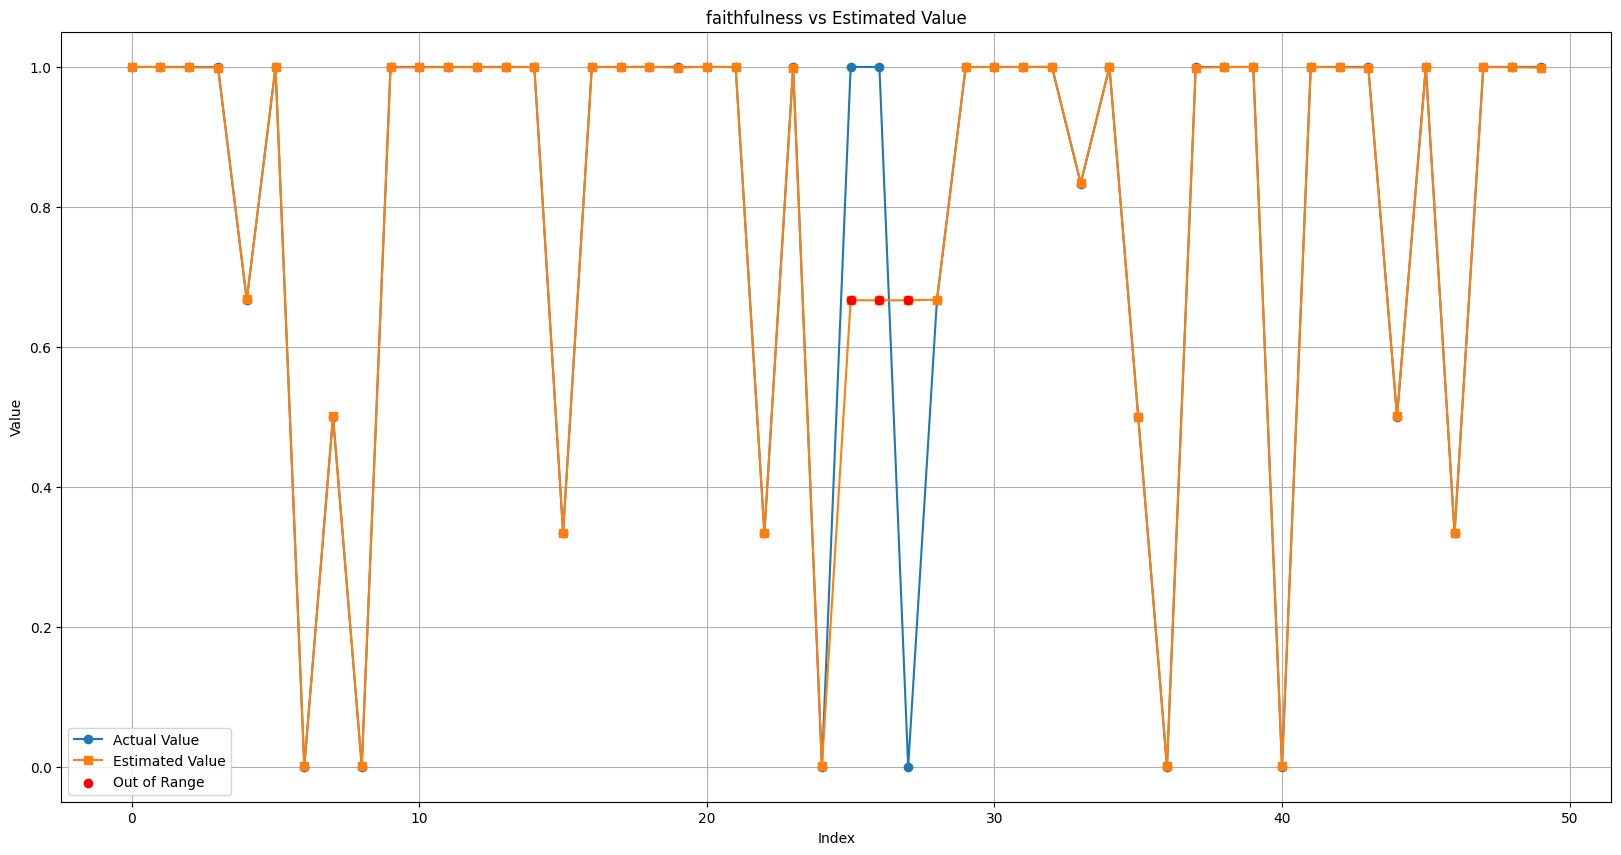

In [10]:
dropdown_values = ["", "faithfulness", "context_precision", "context_recall"]

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=dropdown_values,
    description='Select:',
    disabled=False,
)

# Function to handle the dropdown selection
def on_change(change):
    global sel_metric
    global metric
    global X
    global metric_text
    global df_metric
    sel_metric = change['new']
    # print(f'Selected metric: {sel_metric}')

    # Clear the previous output
    clear_output(wait=True)
    
    # Display the dropdown widget again
    display(dropdown)

    if sel_metric == "faithfulness":
        metric_text = "Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding hallucinations (made-up or false information)"
    elif sel_metric == "context_precision":
        metric_text = "Measures how much of the generated output is relevant and aligns with the context provided in the input."
    elif sel_metric == "context_recall":
        metric_text = "Measures how much of the relevant information in the input context is included in the output."
    
    metric_details = f"""
### **{sel_metric}:** {metric_text}
"""
    # Display a reminder of the metric's definition
    display(Markdown(metric_details))

    # Plot the actual vs estimated values for the selected metric
    metric = sel_metric
    X = pd.DataFrame(genai_explainer.preprocessed_features)

    df_metric = pd.DataFrame(genai_explainer.metrics)[[metric]]
    df_metric['estimated_value'] = genai_explainer.estimators_[metric].predict(X)
    df_metric['is_out_of_range'] = genai_explainer.is_out_of_range_[metric]



    plt.figure(figsize=(20,10))
    plt.plot(df_metric[metric], label='Actual Value', marker='o')
    plt.plot(df_metric['estimated_value'], label='Estimated Value', marker='s')

    # Highlight the out-of-range values
    out_of_range_indices = df_metric[df_metric['is_out_of_range']].index
    plt.scatter(out_of_range_indices, df_metric.loc[out_of_range_indices, 'estimated_value'], color='red', label='Out of Range', zorder=5)

    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'{metric} vs Estimated Value')
    plt.legend()
    plt.grid(True)
    plt.show()
# Attach the function to the dropdown widget
dropdown.observe(on_change, names='value')



display(dropdown)

## Challenge 3 - Step 2: Present the explainability results from SHAP

SHAP (SHapley Additive exPlanations) is a method used to explain the output of machine learning models. It leverages concepts from cooperative game theory to assign each feature an importance value for a particular prediction. SHAP values provide insights into how each feature contributes to the model's output, making it easier to understand and interpret complex models.
In this case, we will use SHAP on top of the models of the metrics we created in the previous steps.

### For the selected metric show the SHAP values of each feature.

`shap.summary_plot` is a function in the SHAP library that visualizes the importance of features in a machine learning model. It provides a summary of the SHAP values for all features, using a combination of dot plots and bar charts. This plot helps to quickly identify which features have the most significant impact on the model's predictions.

In the plot below each dot represents a SHAP value for a feature in a specific instance (data point). Here's how to interpret the dots and colors:

* Dots:
Each dot corresponds to a single instance's SHAP value for a particular feature.
The **position** of the dot on the x-axis shows the **SHAP value**, indicating the impact of that feature on the prediction. Dots further to the right (positive SHAP values) indicate a positive impact on the prediction, while dots further to the left (negative SHAP values) indicate a negative impact.
* Colors:
The **color** of each dot represents the **feature value** for that instance.
In our case, a color gradient (e.g., blue to red) is used, where one end of the spectrum (i.e., blue) represents low feature values and the other end (i.e., red) represents high feature values.
This coloring helps to understand the relationship between the feature value and its impact on the prediction. For example, if red dots (high feature values) are mostly on the right, it indicates that high values of that feature increase the prediction.

By examining the distribution and color of the dots, you can gain insights into how different feature values influence the model's predictions.

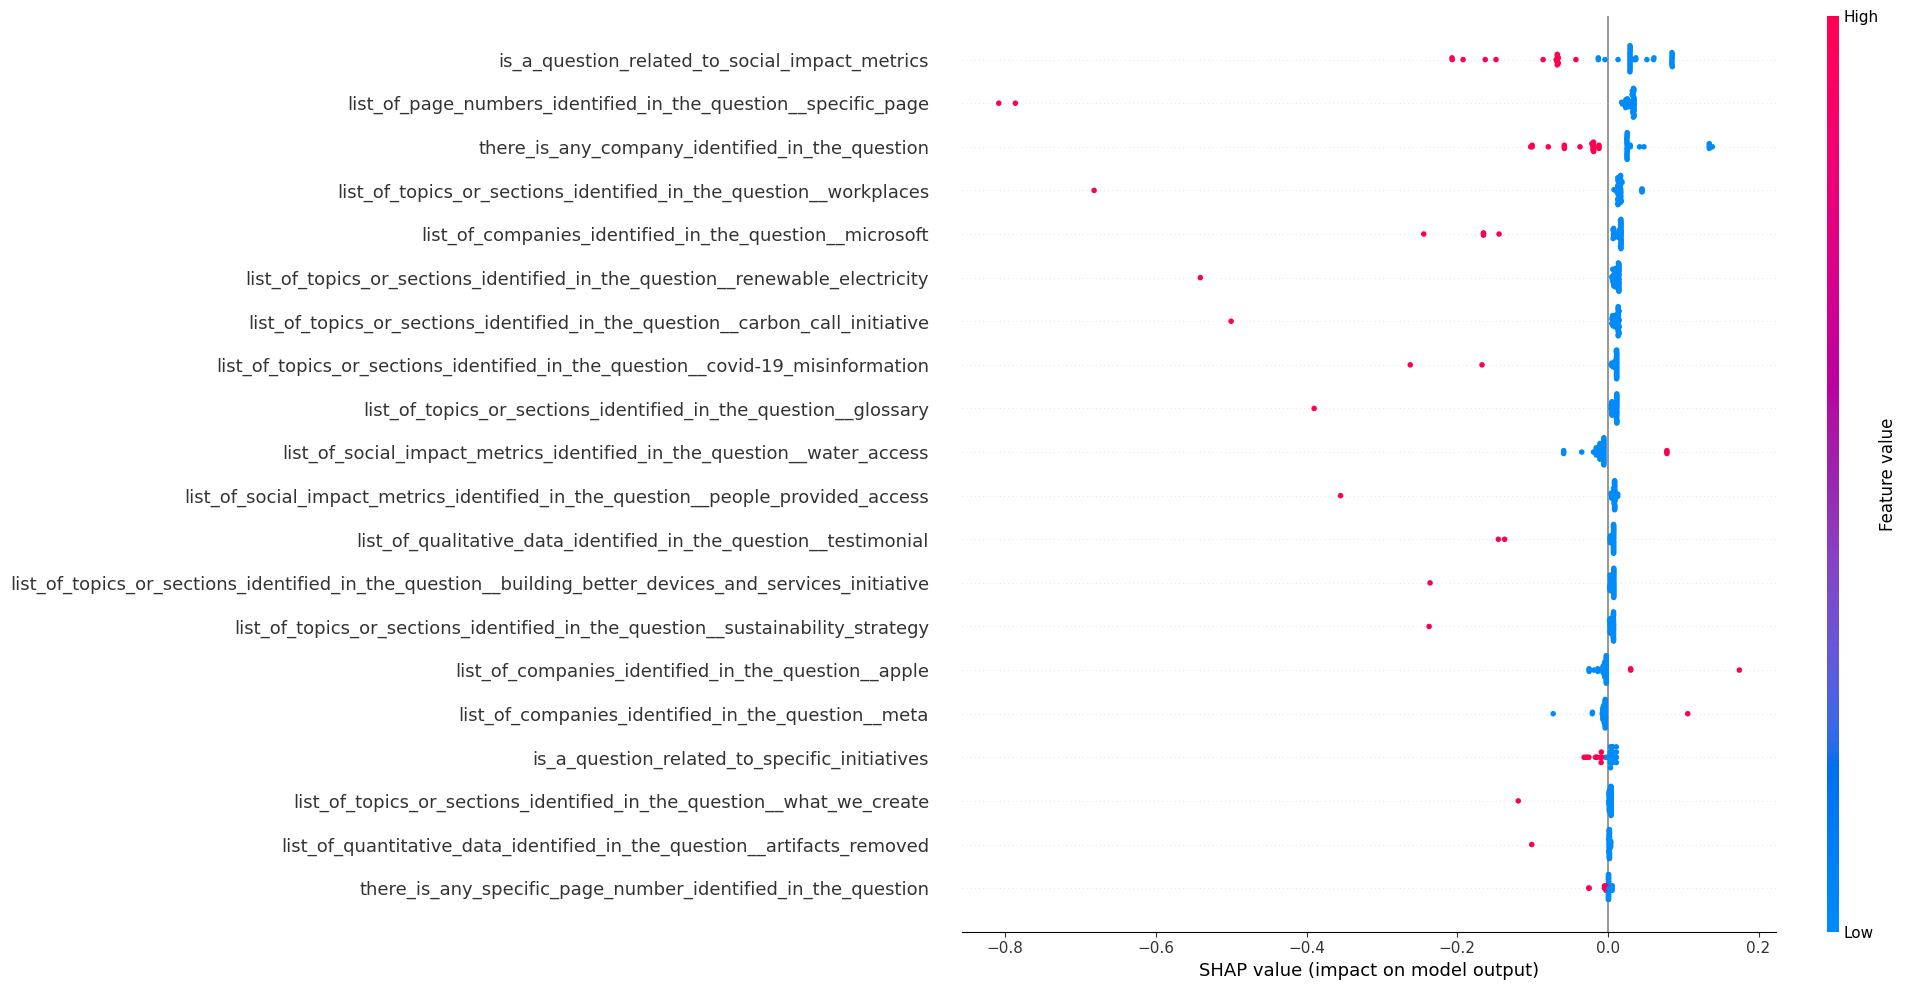

In [11]:
metric_explainer = genai_explainer.explainers_[metric]
shap_values = metric_explainer(X)
shap.summary_plot(shap_values, X, plot_size=(20,10))

### Now let's select one question

For the selected question, display the question, the retrieved contexts, the generated and expected answers, the metric value and the predicted metric from the model trained

Also, show the SHAP values for the selected question (for the previously selected metric). 
`shap.waterfall_plot` is a function in the SHAP library that visualizes the contribution of **each feature to a single prediction**. It breaks down the prediction into the base value (average model output) and the impact of each feature's SHAP value, showing how each feature pushes the prediction higher or lower. This plot helps to understand the specific reasons behind an individual prediction by displaying the cumulative effect of each feature.

Dropdown(description='Select:', index=48, options=(('Can you provide for me the three highlights for the GHG e…


### INDEX 48

**USER INPUT:**
Can you provide the quote by Aditi Sharma?

**RETRIEVED CONTEXT:**


**CHUNK 1:**

Employee Recruitment, Inclusion and Performance
TC-IM-
330a.3
Percentage of gender and racial/ethnic group representation for (1) management Percentage (%) Annual Diversity Report↗
(2) technical staff Percentage (%) Annual Diversity Report↗
(3) all other employees Percentage (%) Annual Diversity Report↗
Intellectual Property Protection and Competitive Behavior
TC-IM-520a.1 Total amount of monetary losses as a result of legal proceedings associated with anticompetitive 
behavior regulations Reporting currency When relevant, see Part I, Item 3 and Part II, Item 8 in Note 10 in our annual report on 
Form 10-K↗ .
SASB INDEX – INTERNET AND MEDIA SERVICES
AboutLeadership Highlights How We Operate What We Create How We Collaborate Governance Looking Ahead Data IndexVision
2021 Meta Sustainability Report
110

**CHUNK 2:**

Introduction Sustainability People Appendix 
Disclaimer 
and Forward-
Looking 
Statements 
The information and opinions contained in this report are 
provided as of the date of this report and are subject to change 
without notice. Amazon does not undertake to update or 
revise any such statements. This report represents current 
Amazon policy and intent and is not intended to create legal 
rights or obligations. This report may contain, or incorporate 
by reference, public information not separately reviewed, 
approved, or endorsed by Amazon, and no representation, 
warranty, or undertaking is made by Amazon as to the accuracy, 
reasonableness, or completeness of such information. Inclusion 
of information in this report is not an indication that the subject 
or information is material to Amazon’s business or operating 
results. This report was originally drafted in English and then 
translated into other languages. The English version is the 
authoritative version. 
This report includes forward-looking statements within the 
meaning of the Private Securities Litigation Reform Act of 
1995. All statements other than statements of historical 
or current facts, including statements regarding our plans, 
initiatives, projections, goals, commitments, expectations, 
or prospects, are forward-looking. These forward-looking 
statements are inherently uncertain and difficult to predict. 
We use words such as aim, anticipate, believe, commit, drive, 
estimate, ensure, expect, goal, intend, may, mission, plan, 
project, seek, strategy, strive, target, will, or similar expressions 
to identify forward-looking statements. Forward-looking 
statements reflect management’s current expectations and 
inherently involve risks and uncertainties. Actual results and 
outcomes could differ materially for a variety of reasons, 
including, among others, assumptions not being realized, 
scientific or technological developments, evolving sustainability 
strategies, changes in carbon markets, evolving government 
regulations, our expansion into new products, services, 
technologies, and geographic regions, or other changes in 
circumstances, as well as the factors set forth in the “Risk 
Factors” section of Amazon’s most recent Annual Report 
on Form 10-K and subsequent filings. The standards of 
measurement and performance contained in the report are 
developing and based on assumptions, and no assurance can 
be given that any plan, initiative, projection, goal, commitment, 
expectation, or prospect set forth in this report can or will 
be achieved. 
81 2022 Amazon Sustainability Report

**RESPONSE:**
The provided context does not contain a quote by Aditi Sharma.

**REFERENCE:**
Through the Take Ten program, I got to learn about writing a screenplay, creating characters, directing actors, along with many other filmmaking lessons. We had the opportunity to do this under the guidance of Film Companion, and being mentored by professionals who are not only good at what they do, but also truly invested in the process of teaching, was extremely helpful. There aren’t any grant opportunities in India to speak of, and to. have a platform like Netflix to showcase your film was a huge deal for a first time filmmaker like me. For the first time, me and my team believed that we had a real shot at this.

**METRIC → faithfulness :** Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding hallucinations (made-up or false information)

**METRIC Value:** 1.000

**MODEL ESTIMATED Value:** 1.000


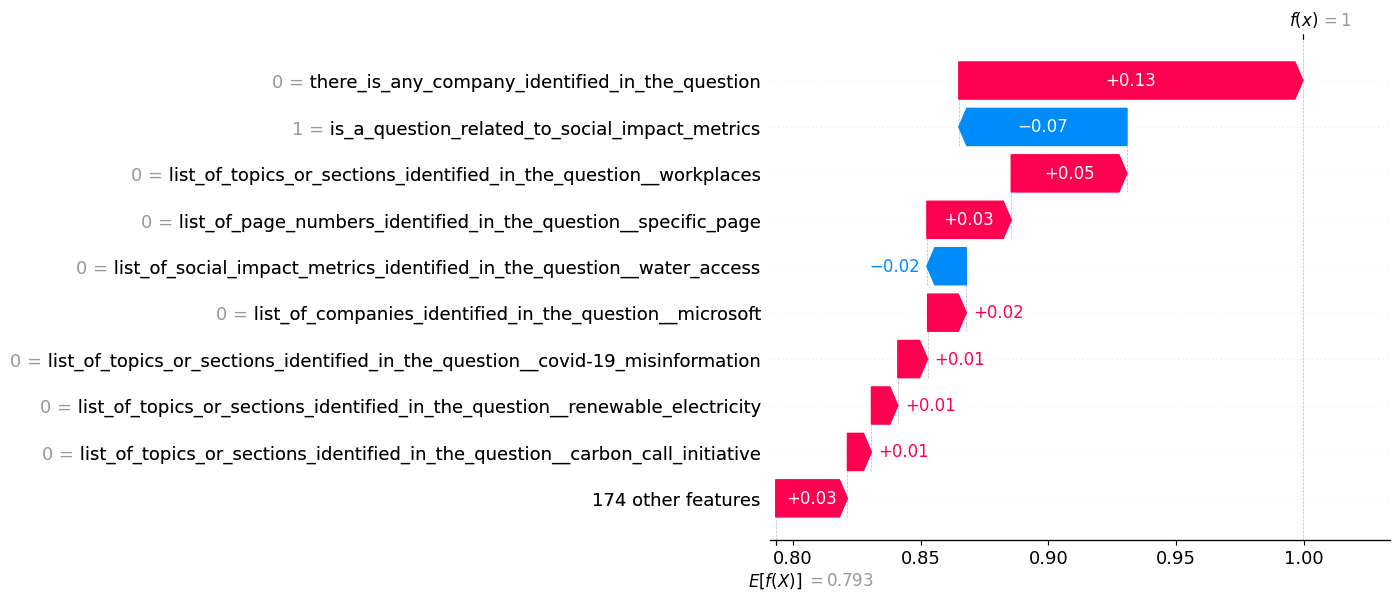

In [12]:
# Define the dropdown values
dropdown_values = df_test_dataset.iloc[:, 0].tolist()

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=[(value, index) for index, value in enumerate(dropdown_values)],
    description='Select:',
    disabled=False,
)

# Function to handle the dropdown selection
def on_change(change):
    global sel_question
    sel_question = change['new']
    # print(f'Selected question: {sel_question}')

    # Clear the previous output
    clear_output(wait=True)
    
    # Display the dropdown widget again
    display(dropdown)

    # Display the details of the selected question
    index = sel_question

    context = df_test_dataset.loc[index,'retrieved_contexts']
    context_str = "\n".join([f"\n**CHUNK {i+1}:**\n\n{c}" for i, c in zip(range(len(context)),context)])

    index_details = f"""
### INDEX {index}

**USER INPUT:**
{df_test_dataset.loc[index,'user_input']}

**RETRIEVED CONTEXT:**

{context_str}

**RESPONSE:**
{df_test_dataset.loc[index,'response']}

**REFERENCE:**
{df_test_dataset.loc[index,'reference']}

**METRIC → {metric} :** {metric_text}

**METRIC Value:** {df_test_dataset.loc[index, metric]:.3f}

**MODEL ESTIMATED Value:** {df_metric.loc[index, 'estimated_value']:.3f}
"""

    display(Markdown(index_details))
    shap.waterfall_plot(shap_values[index])

# Attach the function to the dropdown widget
dropdown.observe(on_change, names='value')

# Display the dropdown widget
display(dropdown)